In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import joblib
import sys

sys.path.append('../../src/')

warnings.filterwarnings("ignore")

In [3]:
!pip install imblearn

In [4]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [5]:
!pip install shap

In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", None)
pd.set_option("display.max_colwidth", None)

In [7]:
df2 = pd.read_csv('D:\document\data_science\DLSL Study case\mini_project_DS\data\inter\dt_alert.csv')

In [8]:
df2.sample(5)

,time,street,type,total_records,is_weekend,hours,jams_weekend,jams_weekday,jams_morning,jams_night,jams_midnight
307,2022-08-18 13:00:00,Ir Haji Juanda,JAM,30,0,13,0.0,1.0,1.0,0.0,0.0
172,2022-07-31 08:00:00,Ir Haji Juanda,WEATHERHAZARD,18,1,8,1.0,0.0,1.0,0.0,0.0
375,2022-08-26 16:00:00,Ir Haji Juanda,JAM,54,0,16,0.0,1.0,1.0,0.0,0.0
435,2022-09-02 21:00:00,Ir Haji Juanda,ACCIDENT,50,0,21,0.0,1.0,0.0,1.0,0.0
94,2022-07-20 17:00:00,Ir Haji Juanda,JAM,7,0,17,0.0,1.0,1.0,0.0,0.0


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           455 non-null    object 
 1   street         455 non-null    object 
 2   type           455 non-null    object 
 3   total_records  455 non-null    int64  
 4   is_weekend     455 non-null    int64  
 5   hours          455 non-null    int64  
 6   jams_weekend   455 non-null    float64
 7   jams_weekday   455 non-null    float64
 8   jams_morning   455 non-null    float64
 9   jams_night     455 non-null    float64
 10  jams_midnight  455 non-null    float64
dtypes: float64(5), int64(3), object(3)
memory usage: 39.2+ KB


In [10]:
df2['hours'] = df2['hours'].astype(np.object)
df2 = df2.drop(['time'],axis=1)

In [11]:
# Grouping Features Based on Their Data Type

num = df2.select_dtypes(include=[np.number], exclude=[np.bool]).columns
cat = df2.select_dtypes(exclude=[np.number]).columns

In [12]:
num

Index(['total_records', 'is_weekend', 'jams_weekend', 'jams_weekday',
       'jams_morning', 'jams_night', 'jams_midnight'],
      dtype='object')

In [13]:
cat

Index(['street', 'type', 'hours'], dtype='object')

In [14]:
df2_cat = pd.get_dummies(df2[cat].iloc[:,:])
df2_cat.head()

,street_Ir Haji Juanda,type_ACCIDENT,type_JAM,type_WEATHERHAZARD,hours_0,hours_3,hours_5,hours_6,hours_7,hours_8,hours_9,hours_10,hours_11,hours_12,hours_13,hours_14,hours_15,hours_16,hours_17,hours_18,hours_19,hours_20,hours_21,hours_22,hours_23
0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [15]:
df2_new = pd.concat([df2[num],df2_cat],axis=1)

In [16]:
df2_new.head()

,total_records,is_weekend,jams_weekend,jams_weekday,jams_morning,jams_night,jams_midnight,street_Ir Haji Juanda,type_ACCIDENT,type_JAM,type_WEATHERHAZARD,hours_0,hours_3,hours_5,hours_6,hours_7,hours_8,hours_9,hours_10,hours_11,hours_12,hours_13,hours_14,hours_15,hours_16,hours_17,hours_18,hours_19,hours_20,hours_21,hours_22,hours_23
0,25,0,0.0,1.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,6,0,0.0,1.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,30,0,0.0,1.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,46,0,0.0,1.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,42,0,0.0,1.0,1.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Modeling

In [17]:
X = df2_new.drop('type_JAM', axis=1)
y = df2_new['type_JAM']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 42,stratify=y)

In [19]:
X_train.shape, X_test.shape

((303, 31), (152, 31))

In [20]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [21]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [22]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 92.10526315789474 % and k = [3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14]


## Result Visualisation

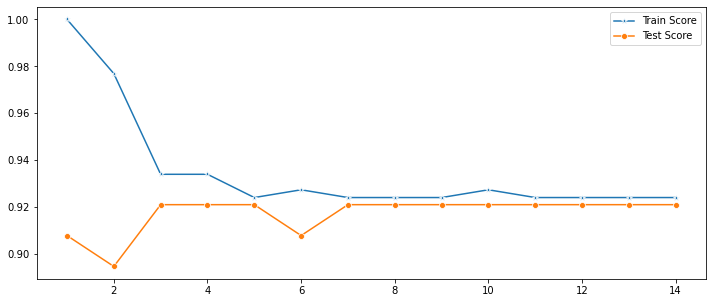

In [23]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [24]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(4)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9210526315789473

## Classification Report

In [25]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,All
True,,
0,12,12
1,140,140
All,152,152


Text(0.5, 15.0, 'Predicted label')

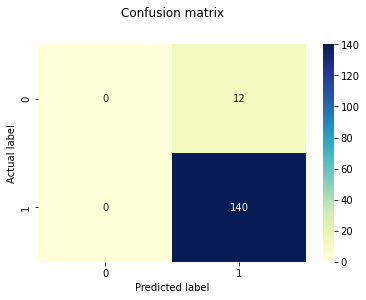

In [26]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.92      1.00      0.96       140

    accuracy                           0.92       152
   macro avg       0.46      0.50      0.48       152
weighted avg       0.85      0.92      0.88       152



##  Feature Importance

In [28]:
!pip install shap

In [29]:
import shap

In [30]:
# Fit the model
knn.fit(X_train, y_train)

# summarize the background data using shap.sample
background = shap.sample(X_train, 30)

# creating an explainer for our model
explainer = shap.KernelExplainer(knn.predict_proba, background) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_train)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

  0%|          | 0/303 [00:00<?, ?it/s]

Expected Value: [0.05 0.95]


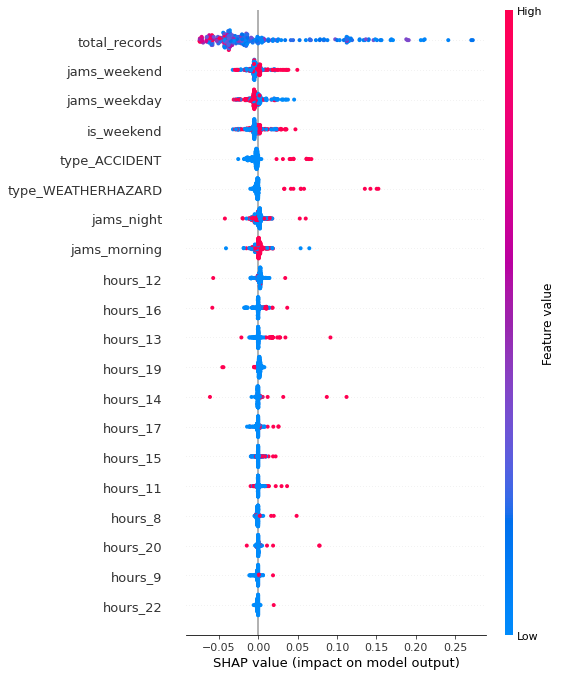

In [37]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

## ROC - AUC

In [32]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

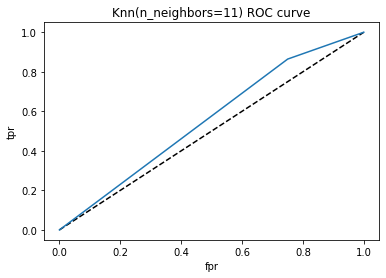

In [33]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [34]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5571428571428572

## Hyper Parameter optimization

In [35]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9230769230769231
Best Parameters: {'n_neighbors': 7}


## junk

In [36]:
# train,test = train_test_split(df1_new, test_size=0.3, stratify=df1_new['level_4'], random_state = 42)
# print("jumlah data training",train.shape[0], "atau", round(train.shape[0]/df1_new.shape[0]*100),'% dari total data')
# print("jumlah data test",test.shape[0], "atau", round(test.shape[0]/df1_new.shape[0]*100),'% dari total data')